In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier

In [11]:
df = pd.read_csv('pcafilewlabels.csv', header = None)


In [12]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.556408,0.000028,0.000418,0.000036,-0.000713,-0.000724,0.001234,-0.000199,0.002731,0.012509,...,0.000281,0.000153,-0.000026,-0.000836,0.003419,0.002796,0.000497,-0.001576,p1,a01
1,-0.555708,0.000018,0.000419,0.000021,-0.000703,-0.000718,0.001231,-0.000156,0.002711,0.012504,...,0.000117,0.000206,0.000019,-0.001139,0.003907,0.003582,0.000851,-0.002051,p1,a01
2,-0.556088,0.000028,0.000417,0.000039,-0.000715,-0.000728,0.001247,-0.000215,0.002794,0.012733,...,0.000329,0.000222,0.000167,-0.000898,0.003403,0.002881,0.000560,-0.001549,p1,a01
3,-0.555757,0.000019,0.000425,0.000024,-0.000701,-0.000714,0.001223,-0.000171,0.002714,0.012477,...,0.000212,0.000121,-0.000067,-0.000782,0.003404,0.002836,0.000426,-0.001647,p1,a01
4,-0.555139,0.000005,0.000428,0.000008,-0.000681,-0.000712,0.001199,-0.000148,0.002652,0.012260,...,-0.000058,0.000433,0.000297,-0.001159,0.003651,0.003394,0.000734,-0.001825,p1,a01


In [13]:
X2 = df.iloc[:,40:42]
X2 = X2.apply(LabelEncoder().fit_transform)

In [15]:
df.drop([40,41], axis = 1, inplace = True)

In [17]:
X_t = df.join(X2)
X_t.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.556408,0.000028,0.000418,0.000036,-0.000713,-0.000724,0.001234,-0.000199,0.002731,0.012509,...,0.000281,0.000153,-0.000026,-0.000836,0.003419,0.002796,0.000497,-0.001576,0,0
1,-0.555708,0.000018,0.000419,0.000021,-0.000703,-0.000718,0.001231,-0.000156,0.002711,0.012504,...,0.000117,0.000206,0.000019,-0.001139,0.003907,0.003582,0.000851,-0.002051,0,0
2,-0.556088,0.000028,0.000417,0.000039,-0.000715,-0.000728,0.001247,-0.000215,0.002794,0.012733,...,0.000329,0.000222,0.000167,-0.000898,0.003403,0.002881,0.000560,-0.001549,0,0
3,-0.555757,0.000019,0.000425,0.000024,-0.000701,-0.000714,0.001223,-0.000171,0.002714,0.012477,...,0.000212,0.000121,-0.000067,-0.000782,0.003404,0.002836,0.000426,-0.001647,0,0
4,-0.555139,0.000005,0.000428,0.000008,-0.000681,-0.000712,0.001199,-0.000148,0.002652,0.012260,...,-0.000058,0.000433,0.000297,-0.001159,0.003651,0.003394,0.000734,-0.001825,0,0


In [18]:
X = X_t.iloc[:,0:40]
y = X_t[41]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 451)


In [20]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [21]:
labels=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19']

In [22]:
## Plotting confusion matrix

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    figure(figsize=(10,10), dpi=80)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test,class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

training the model..
Done....!

==> training time:- 0:00:03.024011

Predicting test data
Done....!

==> testing time:- 0:00:00.038988

==> Accuracy:- 0.9177631578947368


 ********Confusion Matrix********

 [[ 90   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0]
 [  0  79   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 101   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0]
 [  0   0   0  88   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  92   8   0   2   1   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   2  97   0   0   4   0   0   0   0   0   0   0   0   0
    0]
 [  0   6   0   0   0   0  80   6   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   2   0   0   4   0  10  72   1   3   1   0   1   1   0   0   1   0
    2]
 [  0   0   0   0   3  10   0   0  76  20   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   1   7  68   1   0   0   1   0   

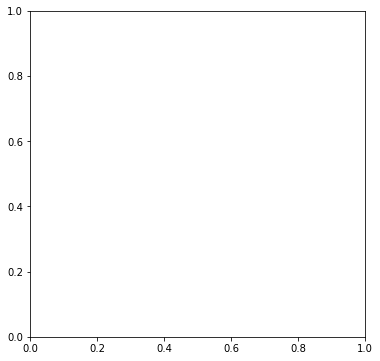

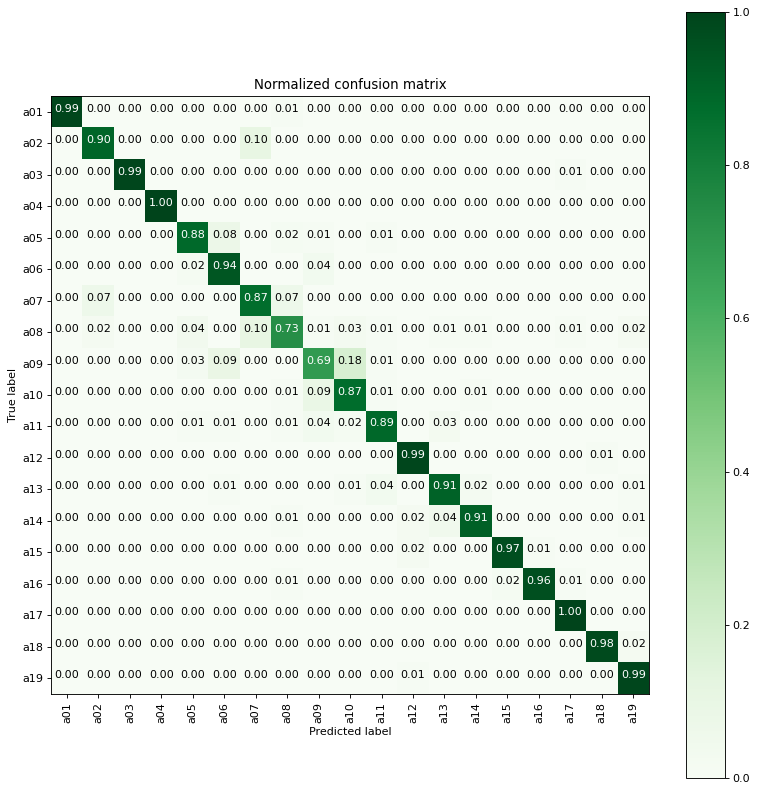

In [24]:
rfc = RandomForestClassifier()
rf_model=perform_model(rfc, X_train, y_train, X_test, y_test,class_labels=labels)
rf_model